In [1]:
from lbmpy.session import *

# Demo: Create lbmpy Method from Scratch

<img src='../img/collision_space.svg' width="90%">


### Defining transformation to collision space

In [2]:
from lbmpy.moments import moment_matrix, moments_up_to_component_order, exponents_to_polynomial_representations
moment_exponents = list(moments_up_to_component_order(2, 2))
moment_exponents

In [3]:
moments = exponents_to_polynomial_representations(moment_exponents)
moments

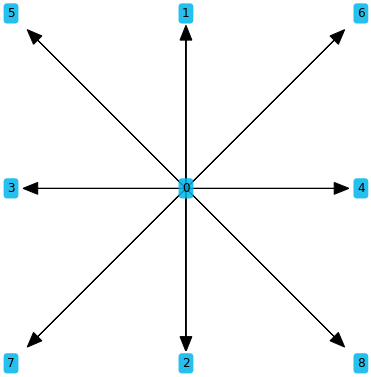

In [4]:
d2q9 = LBStencil(Stencil.D2Q9, ordering='walberla')
d2q9.plot()

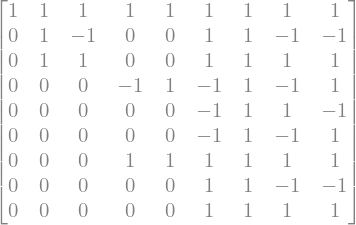

In [5]:
M = moment_matrix(moments, stencil=d2q9)
M

### Defining the Equilibrium Distribution, and Computation of Conserved Quantities

In [6]:
from lbmpy.equilibrium import ContinuousHydrodynamicMaxwellian
from lbmpy.methods import DensityVelocityComputation

equilibrium = ContinuousHydrodynamicMaxwellian(dim=2, compressible=True, order=2)
cqc = DensityVelocityComputation(d2q9, True, False)

tuple(zip(moments, equilibrium.moments(moments)))

### Defining Relaxation Behaviour and Creating the Method

In [7]:
from lbmpy.methods.creationfunctions import create_from_equilibrium

omega = sp.symbols("omega")
relaxation_rate_dict = {moment : omega for moment in moments}

force_model = forcemodels.Guo(sp.symbols("F_:2"))
method = create_from_equilibrium(d2q9, equilibrium, cqc, relaxation_rate_dict)
method

### Example of a update equation without simplifications

In [8]:
collision_rule = method.get_collision_rule()
collision_rule

$$vel0Term \leftarrow f_{4} + f_{6} + f_{8}$$
$$vel1Term \leftarrow f_{1} + f_{5}$$
$$\rho \leftarrow f_{0} + f_{2} + f_{3} + f_{7} + vel0Term + vel1Term$$
$$u_{0} \leftarrow \frac{- f_{3} - f_{5} - f_{7} + vel0Term}{\rho}$$
$$u_{1} \leftarrow \frac{- f_{2} + f_{6} - f_{7} - f_{8} + vel1Term}{\rho}$$
$$\delta_{\rho} \leftarrow \rho - 1$$
$$d_{0} \leftarrow f_{0} + \omega \left(c_{s}^{4} \rho + c_{s}^{2} \rho u_{0}^{2} + c_{s}^{2} \rho u_{1}^{2} - f_{5} - f_{6} - f_{7} - f_{8}\right) - \omega \left(c_{s}^{2} \rho - f_{1} - f_{2} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{1}^{2}\right) - \omega \left(c_{s}^{2} \rho - f_{3} - f_{4} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{0}^{2}\right) + \omega \left(- f_{0} - f_{1} - f_{2} - f_{3} - f_{4} - f_{5} - f_{6} - f_{7} - f_{8} + \rho\right)$$
$$d_{1} \leftarrow f_{1} - \frac{\omega \left(c_{s}^{2} \rho u_{1} - f_{5} - f_{6} + f_{7} + f_{8}\right)}{2} + \frac{\omega \left(- f_{1} + f_{2} - f_{5} - f_{6} + f_{7} + f_{8} + \rho u_{1}\right)}{2} - \frac{\omega \left(c_{s}^{4} \rho + c_{s}^{2} \rho u_{0}^{2} + c_{s}^{2} \rho u_{1}^{2} - f_{5} - f_{6} - f_{7} - f_{8}\right)}{2} + \frac{\omega \left(c_{s}^{2} \rho - f_{1} - f_{2} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{1}^{2}\right)}{2}$$
$$d_{2} \leftarrow f_{2} + \frac{\omega \left(c_{s}^{2} \rho u_{1} - f_{5} - f_{6} + f_{7} + f_{8}\right)}{2} - \frac{\omega \left(- f_{1} + f_{2} - f_{5} - f_{6} + f_{7} + f_{8} + \rho u_{1}\right)}{2} - \frac{\omega \left(c_{s}^{4} \rho + c_{s}^{2} \rho u_{0}^{2} + c_{s}^{2} \rho u_{1}^{2} - f_{5} - f_{6} - f_{7} - f_{8}\right)}{2} + \frac{\omega \left(c_{s}^{2} \rho - f_{1} - f_{2} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{1}^{2}\right)}{2}$$
$$d_{3} \leftarrow f_{3} + \frac{\omega \left(c_{s}^{2} \rho u_{0} + f_{5} - f_{6} + f_{7} - f_{8}\right)}{2} - \frac{\omega \left(f_{3} - f_{4} + f_{5} - f_{6} + f_{7} - f_{8} + \rho u_{0}\right)}{2} - \frac{\omega \left(c_{s}^{4} \rho + c_{s}^{2} \rho u_{0}^{2} + c_{s}^{2} \rho u_{1}^{2} - f_{5} - f_{6} - f_{7} - f_{8}\right)}{2} + \frac{\omega \left(c_{s}^{2} \rho - f_{3} - f_{4} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{0}^{2}\right)}{2}$$
$$d_{4} \leftarrow f_{4} - \frac{\omega \left(c_{s}^{2} \rho u_{0} + f_{5} - f_{6} + f_{7} - f_{8}\right)}{2} + \frac{\omega \left(f_{3} - f_{4} + f_{5} - f_{6} + f_{7} - f_{8} + \rho u_{0}\right)}{2} - \frac{\omega \left(c_{s}^{4} \rho + c_{s}^{2} \rho u_{0}^{2} + c_{s}^{2} \rho u_{1}^{2} - f_{5} - f_{6} - f_{7} - f_{8}\right)}{2} + \frac{\omega \left(c_{s}^{2} \rho - f_{3} - f_{4} - f_{5} - f_{6} - f_{7} - f_{8} + \rho u_{0}^{2}\right)}{2}$$


### Generic simplification strategy - common subexpresssion elimination

In [9]:
generic_strategy = ps.simp.SimplificationStrategy()
generic_strategy.add(ps.simp.sympy_cse)
generic_strategy.create_simplification_report(collision_rule)

Name,Runtime,Adds,Muls,Divs,Total
OriginalTerm,-,245,248,2,495
sympy_cse,30.74 ms,82,36,1,119


### A custom simplification strategy for moment-based methods

In [10]:
simplification_strategy = create_simplification_strategy(method)
simplification_strategy.create_simplification_report(collision_rule)
simplification_strategy.add(ps.simp.sympy_cse)